# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing requried Library

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install -U imbalanced-learn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0


In [2]:
## Loading dataset
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head(10)

#Checking first 10 values of our data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
#Checking Last 10 values of our data

df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
#Checking the shape the dataset
df.shape

(1470, 35)

This dataset have 1470 rows and 35 columns including Attrition column

In [8]:
#Checking datatype of dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

This dataset's 9 attributes have Object data Type and 24 attribute have integer datatype.

In [9]:
#Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#Checking Null Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This dataset has no Null Values.

<AxesSubplot:title={'center':'NUll values'}>

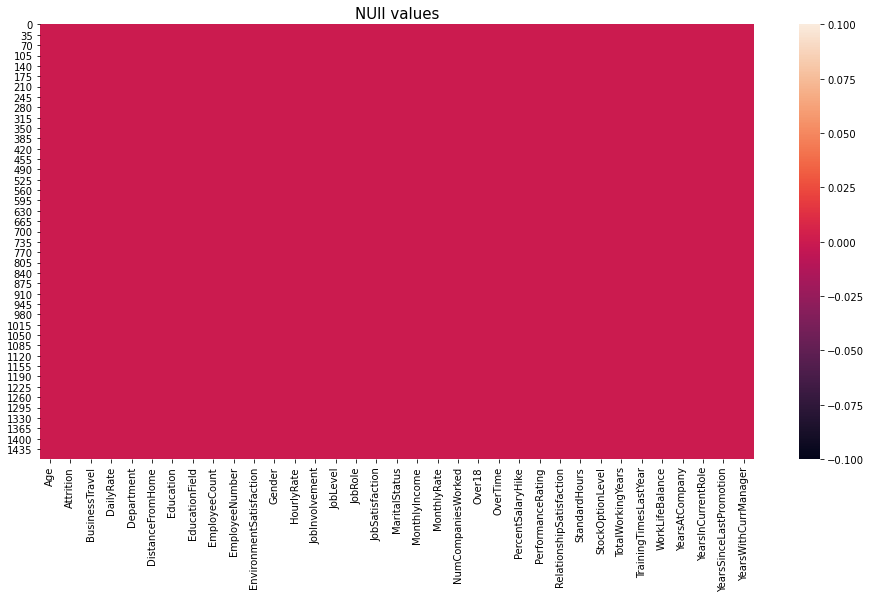

In [11]:
plt.figure(figsize=(16,8))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull())

This dataset has no Null Values

In [12]:
#Statistical Summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can clearly say that Monthly Income, Monthly rate are Right skewed because Mean values is greater than the Median Values.

Most of attribute of median values(50%) is near to it's mean value which means data is normally distributed.

Columns like StandardHours,EmployeeCount only single number is repeated, Means there is a constant values present which has no significance.

In columns such as StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager have the minimun values is Zero which shows that some new joining/Recent joining are also present in our Dataset.

In [13]:
#Checking the unique values in these columns.

print(df['EmployeeCount'].unique())
print(df['StandardHours'].unique())

[1]
[80]


In [14]:
#Dropping the duplicate columns

df_1=df.drop(['EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

We dropped EmployeeCount because it has only one unique values.

we dropped EmployeeCount,EmployeeNumber because it is just a counting number of employees , it has no significance for checking Attrition.

# Categorcial Attributes

In [15]:
#segregating the object datatype.
ob=df_1.select_dtypes(include='object')

In [16]:
# Checking values counts for each categorical columns

for column in df.columns:
    if df[column].dtype == object:
        print (str(column)+ ':'+ str (df[column].unique()))
        print (df[column].value_counts())
        print('________________________________________________________________________')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
________________________________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
________________________________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
________________________________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
____________________________________________________________

Target attribute is imbalance.(ration 4:1)

Over18 column has only one category. we can drop it further.

# Data Visualization

<AxesSubplot:title={'center':'Target data Distribution'}, xlabel='Attrition', ylabel='count'>

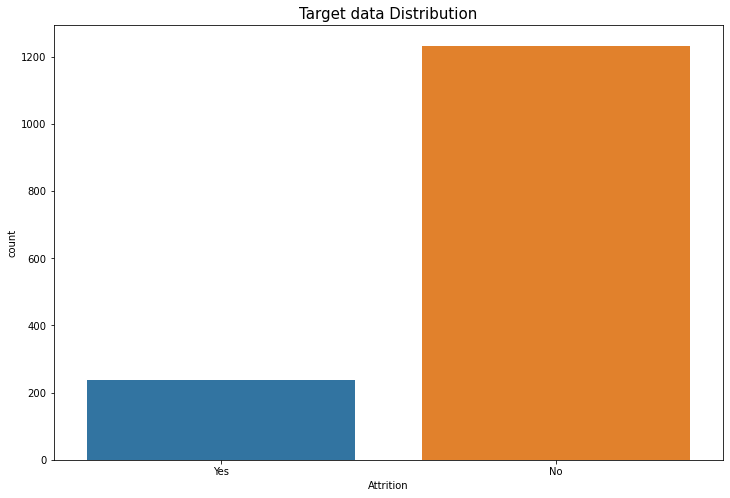

In [17]:
plt.figure(figsize=(12,8))
plt.title('Target data Distribution',fontsize=15)
sns.countplot(df_1['Attrition'],data=df_1)

This Data is Imbalance in nature because ratio is (4:1).

We can see that more than 1200 employess are still working in the company and more than 200 employess left the company.

<AxesSubplot:title={'center':'Age effect on Attrition'}, xlabel='Age', ylabel='count'>

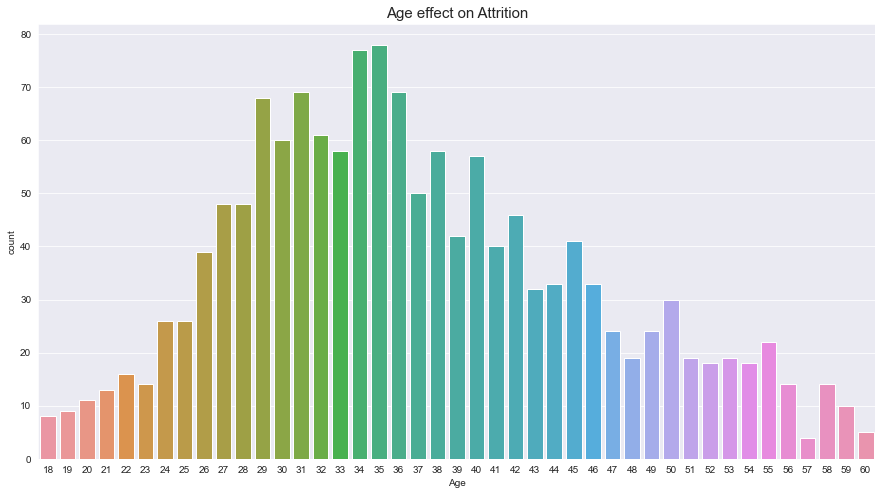

In [26]:
#Show the number of employees that stayed and left the company by age

plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Age effect on Attrition',fontsize=15)
sns.countplot(df_1['Age'],data=df_1[df_1['Attrition']=='Yes'])

<AxesSubplot:title={'center':'Age vs Attrition'}, xlabel='Age'>

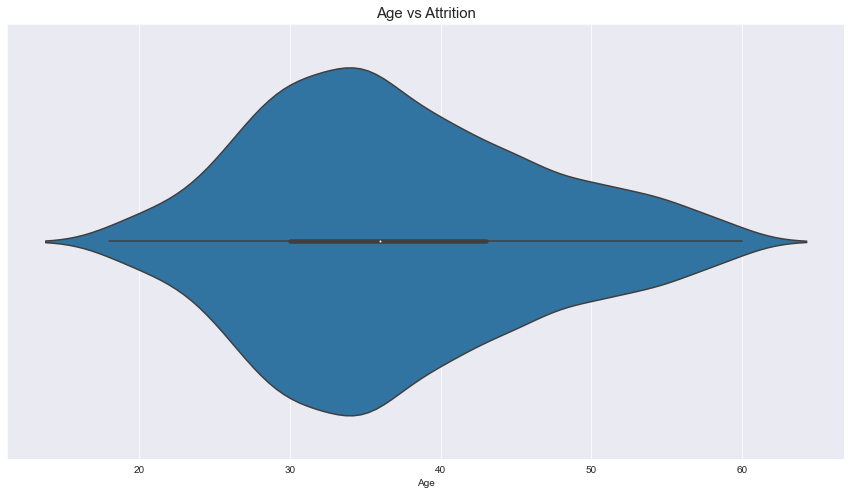

In [27]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Age vs Attrition',fontsize=15)
sns.violinplot(df_1['Age'],data=df_1[df_1['Attrition']=='Yes'])

We can analyse that the Age group of 34,35 are the highest number of employees who are currently working in company

and

Most of the employees who have left the company are between 28 and 37 years of age

<AxesSubplot:title={'center':'Overtime vs Attrition Relation'}, xlabel='OverTime', ylabel='count'>

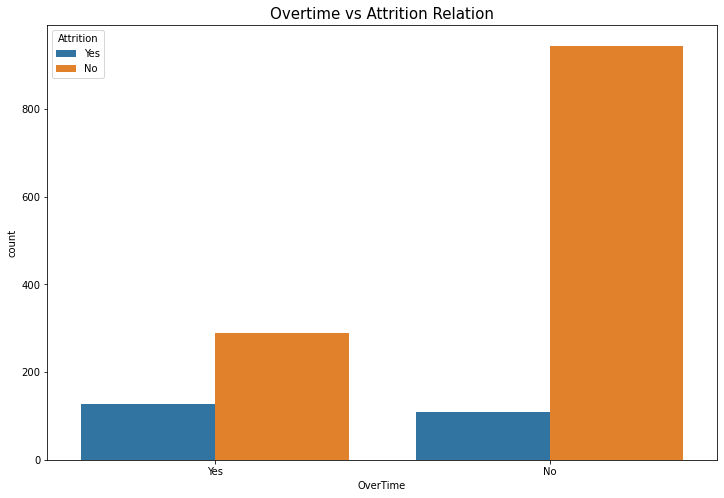

In [19]:
plt.figure(figsize=(12,8))
plt.title('Overtime vs Attrition Relation',fontsize=15)
sns.countplot(df_1['OverTime'],hue='Attrition',data=df_1)

We can clearly see that people who do over-time have higher chances to left the company compared to those who don't do over-time.

<AxesSubplot:title={'center':'Job Role vs Attrition Relation'}, xlabel='JobRole', ylabel='count'>

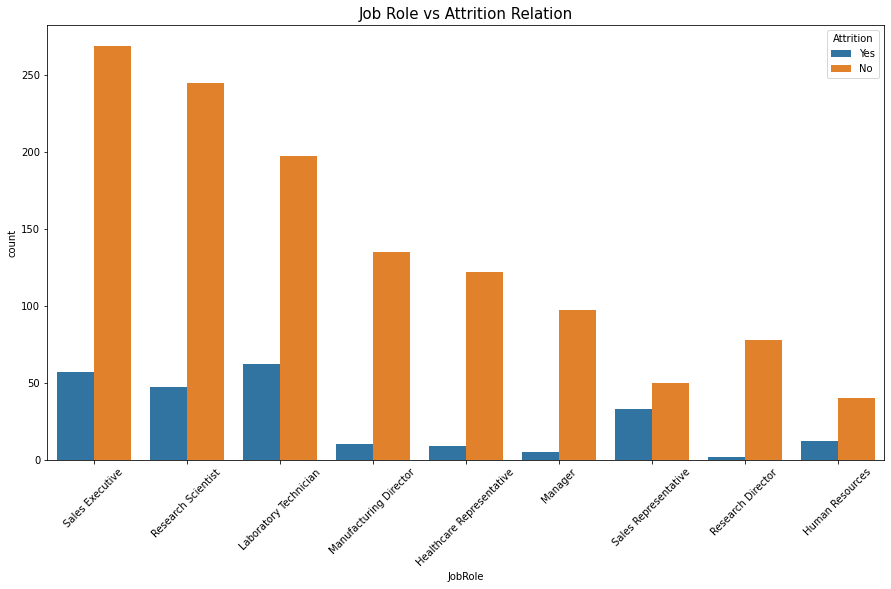

In [20]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Job Role vs Attrition Relation',fontsize=15)
sns.countplot(df_1['JobRole'],hue='Attrition',data=df_1)

Research scientis, Sales Executive, Sales representatives, Laboratory Technician have higher tendency to leave job.

<AxesSubplot:title={'center':'MaritalStatus vs Attrition Relation'}, xlabel='MaritalStatus', ylabel='count'>

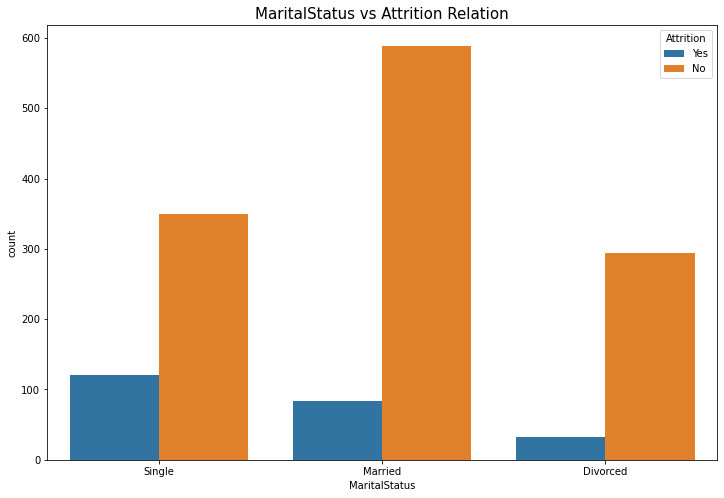

In [21]:
plt.figure(figsize=(12,8))
plt.title('MaritalStatus vs Attrition Relation',fontsize=15)
sns.countplot(df_1['MaritalStatus'],hue='Attrition',data=df_1)

Unmarried employees have higher tendency to leave the company compared to Married.

Divorced has lowest chanaces to left the company.

<AxesSubplot:title={'center':'Sex vs Attrition Relation'}, xlabel='Gender', ylabel='count'>

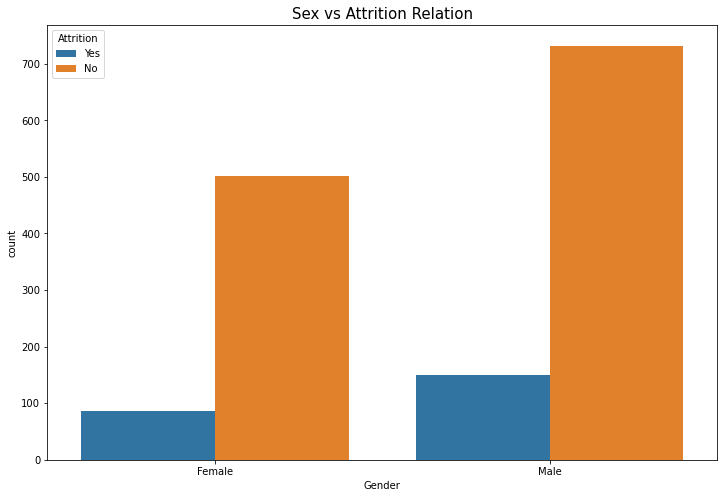

In [22]:
plt.figure(figsize=(12,8))
plt.title('Sex vs Attrition Relation',fontsize=15)
sns.countplot(df_1['Gender'],hue='Attrition',data=df_1)

Male employees has higher chances to change job compared to Female employees

<AxesSubplot:title={'center':'EducationField vs Attrition Relation'}, xlabel='EducationField', ylabel='count'>

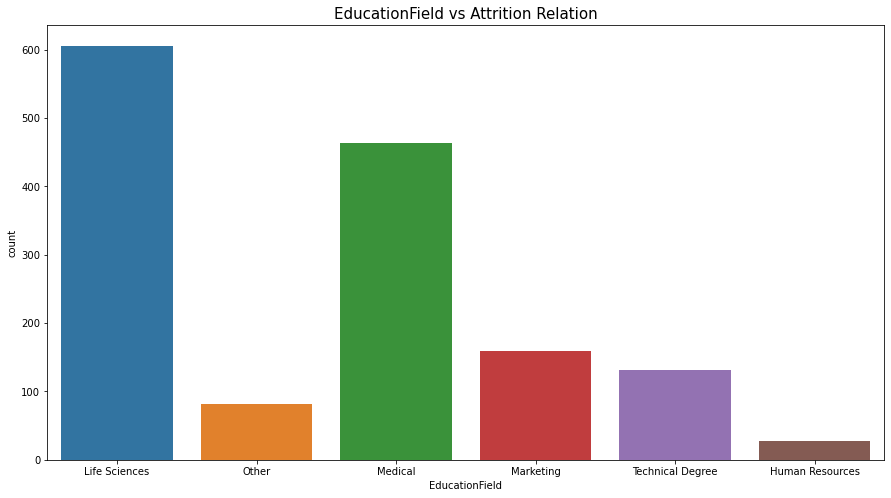

In [23]:
plt.figure(figsize=(15,8))
plt.title('EducationField vs Attrition Relation',fontsize=15)
sns.countplot(df_1['EducationField'],data=df_1[df_1['Attrition']=='Yes'])

Life science and Medical are two major Education fields which has higher chance of swittching job more frequently.

<AxesSubplot:title={'center':'Department vs Attrition'}, xlabel='Department', ylabel='count'>

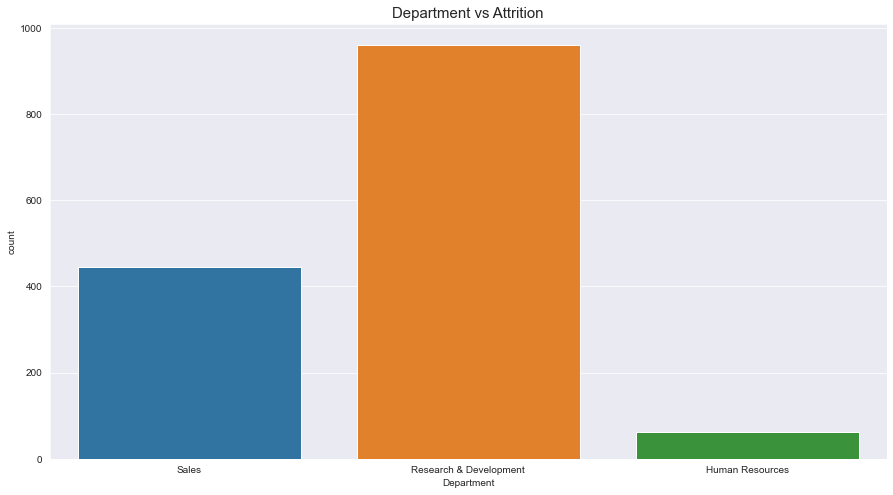

In [24]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Department vs Attrition',fontsize=15)
sns.countplot(df_1['Department'],data=df_1[df_1['Attrition']=='Yes'])

Employees who works in Research & development have higher chances to leave the company.

HR department employees have least chances to job change.

<AxesSubplot:title={'center':'BusinessTravel vs Attrition'}, xlabel='BusinessTravel', ylabel='count'>

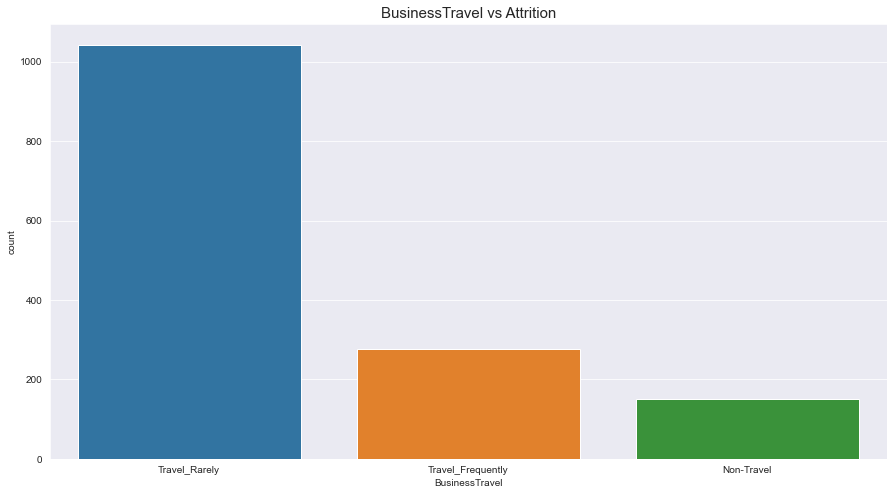

In [25]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(df_1['BusinessTravel'],data=df_1[df_1['Attrition']=='Yes'])

<AxesSubplot:title={'center':'BusinessTravel vs Attrition'}, xlabel='BusinessTravel', ylabel='count'>

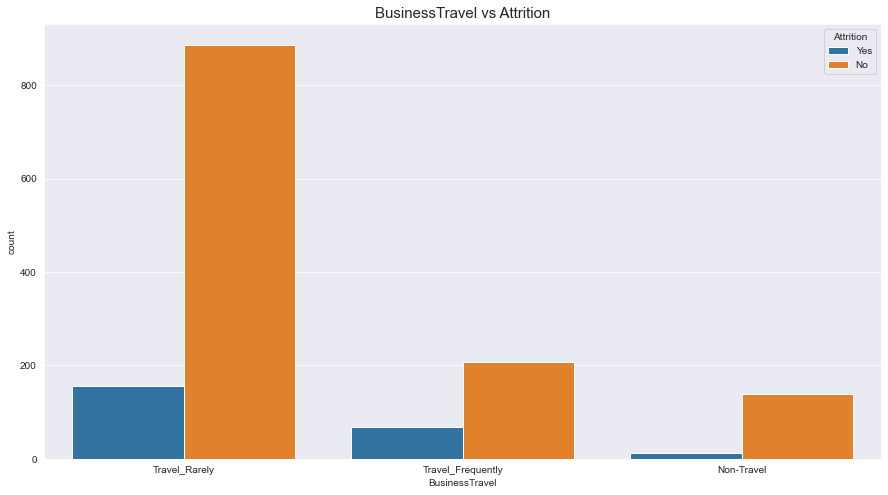

In [28]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(df_1['BusinessTravel'],hue='Attrition',data=df_1)

Employees who travels rarely to other places have higher chances to left job.

<AxesSubplot:title={'center':'JobSatisfaction on Attrition'}, xlabel='JobSatisfaction', ylabel='count'>

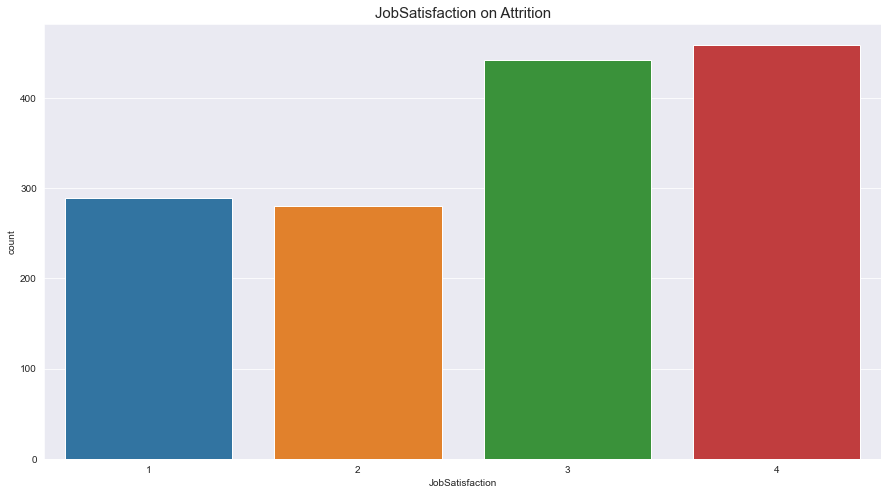

In [30]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('JobSatisfaction on Attrition',fontsize=15)
sns.countplot(df_1['JobSatisfaction'],data=df_1[df_1['Attrition']=='Yes'])

An Employee with 3 or 4 job satisfaction grade has higher chances to left company.

<AxesSubplot:title={'center':'Number of years worked in company vs Attrition'}, xlabel='YearsAtCompany', ylabel='count'>

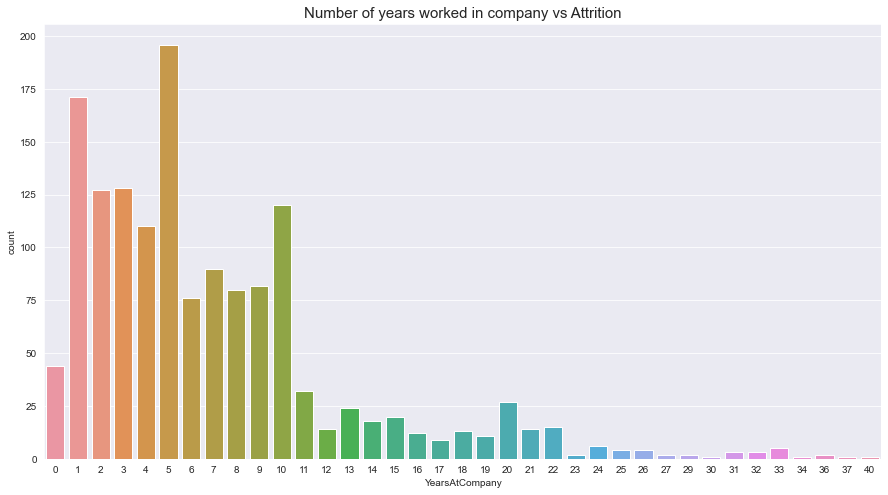

In [31]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Number of years worked in company vs Attrition',fontsize=15)
sns.countplot(df_1['YearsAtCompany'],data=df_1[df_1['Attrition']=='Yes'])

An employee who has worked 5 years in company has highest chances to left the comapany.

Also, An employee who has worked only 1 year in company has also the sencond most tenedency for job change.

<AxesSubplot:title={'center':'Last Promotion  vs Attrition'}, xlabel='YearsSinceLastPromotion', ylabel='count'>

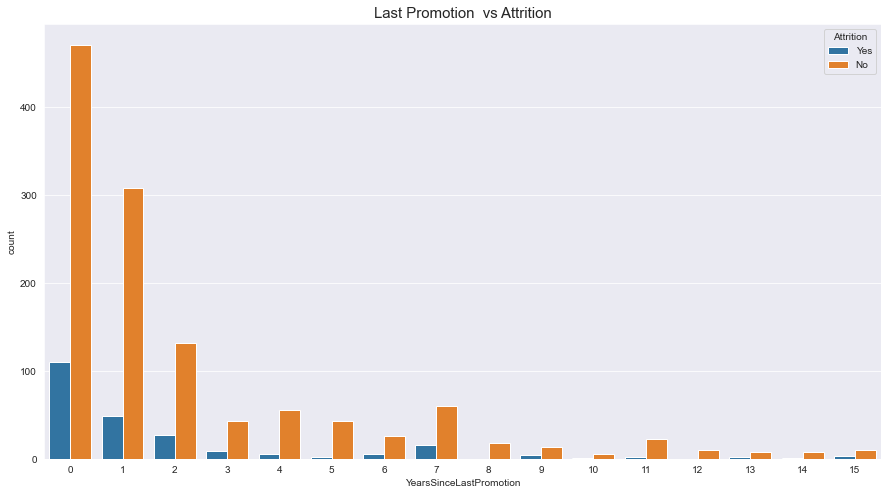

In [32]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Last Promotion  vs Attrition',fontsize=15)
sns.countplot(df_1['YearsSinceLastPromotion'],hue='Attrition',data=df_1)

An employee who either got promoted recently or Joined recently has the highest chances of job change.

An employee who did not get promtion for 1-2 years also have a good chances for job change.

<AxesSubplot:title={'center':'Years In CurrentRole  vs Attrition'}, xlabel='YearsInCurrentRole', ylabel='count'>

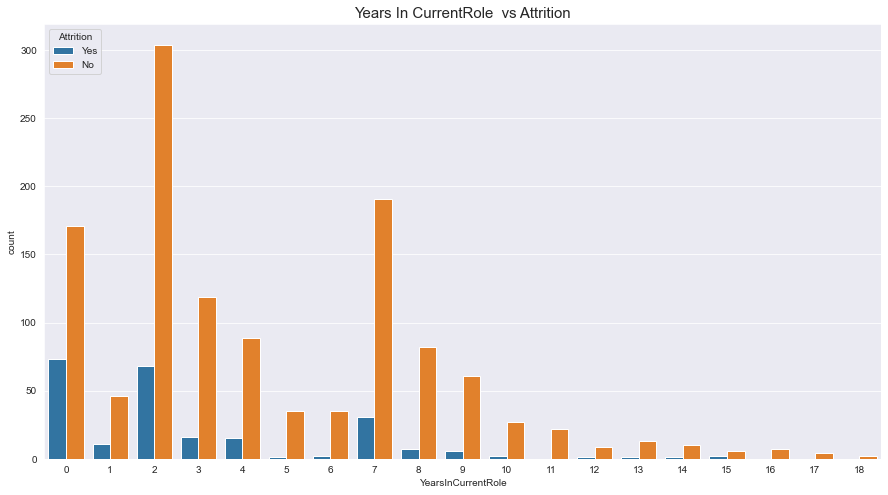

In [33]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Years In CurrentRole  vs Attrition',fontsize=15)
sns.countplot(df_1['YearsInCurrentRole'],hue='Attrition',data=df_1)

An employee who has experience of 2 years or who joined recently and woking on same profile has fair chances to left job.

<AxesSubplot:title={'center':'PercentSalaryHike  vs Attrition'}, xlabel='PercentSalaryHike', ylabel='count'>

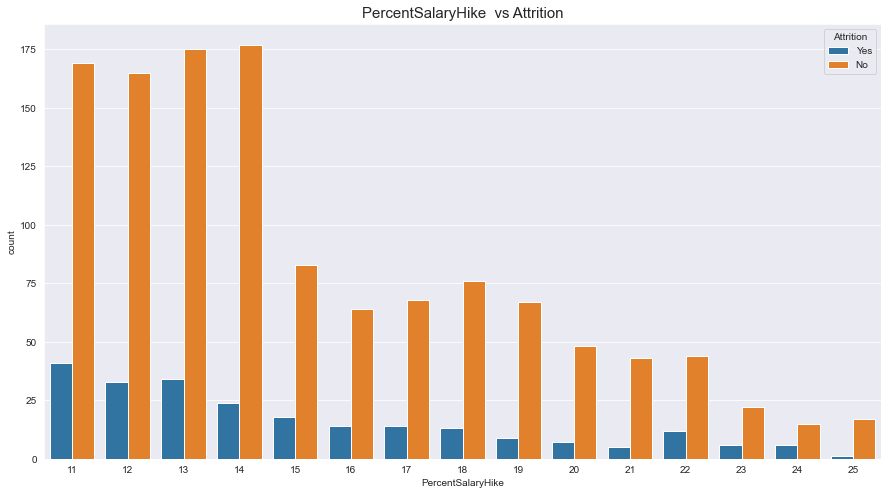

In [35]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('PercentSalaryHike  vs Attrition',fontsize=15)
sns.countplot(df_1['PercentSalaryHike'],hue='Attrition',data=df_1)

An employee who got least salary hike in year have higher tendency for job change.

<AxesSubplot:title={'center':'JobLevel vs Attrition'}, xlabel='JobLevel', ylabel='count'>

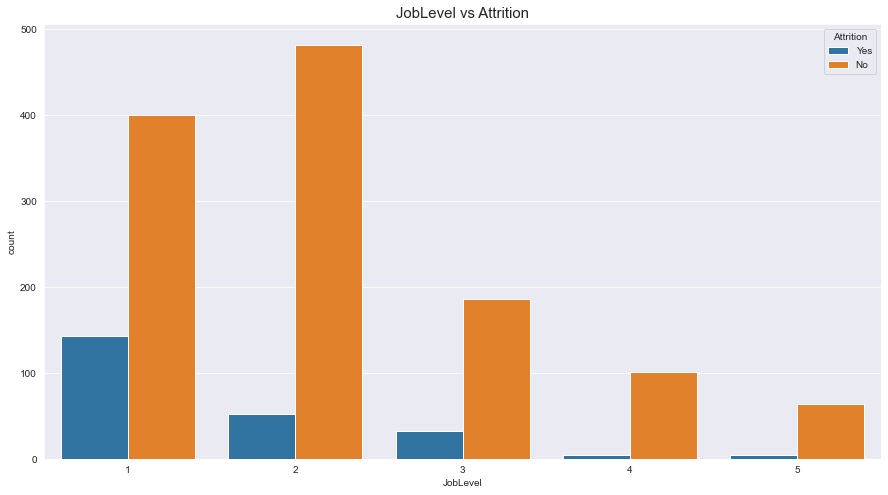

In [36]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('JobLevel vs Attrition',fontsize=15)
sns.countplot(df_1['JobLevel'],hue='Attrition',data=df_1)

An employee who has job level 1 has tendency to change job more frequent compared to job level 4 or 5.

<AxesSubplot:title={'center':'NumCompaniesWorked vs Attrition'}, xlabel='NumCompaniesWorked', ylabel='count'>

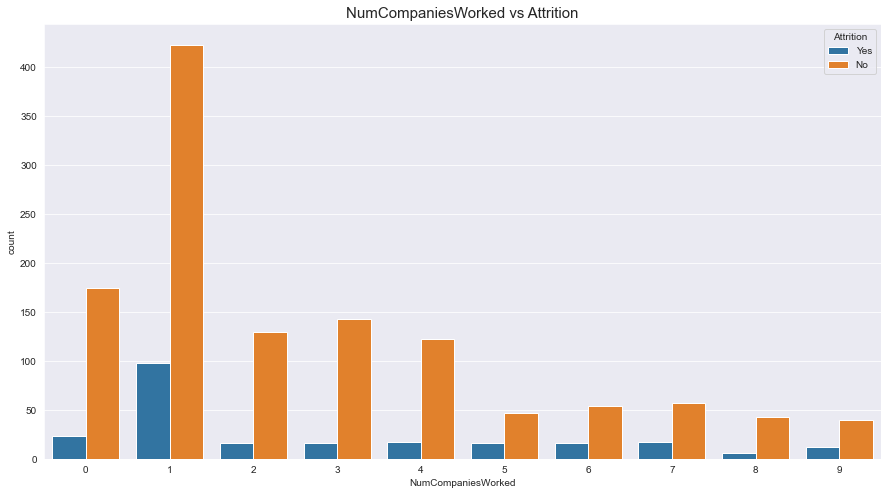

In [37]:
plt.figure(figsize=(15,8))
plt.title('NumCompaniesWorked vs Attrition',fontsize=15)
sns.countplot(df_1['NumCompaniesWorked'],hue='Attrition',data=df_1)

An employee who has worked with 1 company previously are more looking for job change.

<AxesSubplot:title={'center':'Monthly Income vs Attrition'}, xlabel='Attrition', ylabel='MonthlyIncome'>

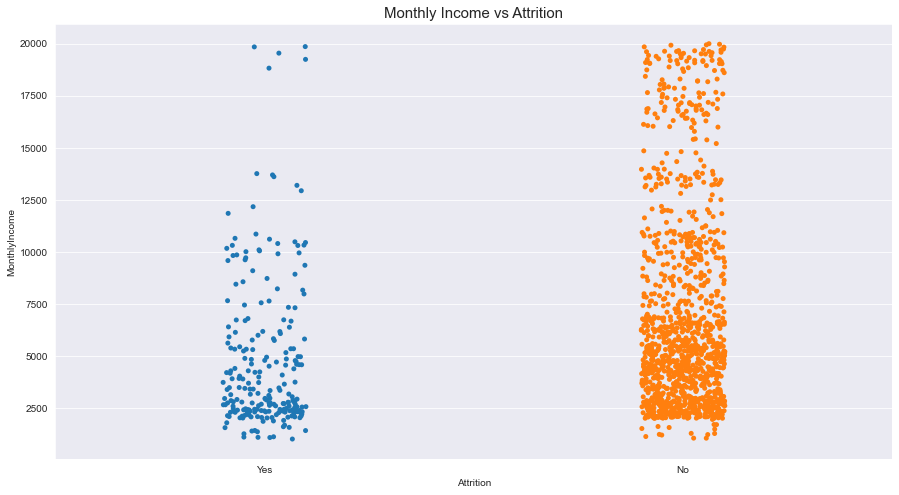

In [38]:
plt.figure(figsize=(15,8))
plt.title('Monthly Income vs Attrition',fontsize=15)
sns.stripplot(df_1['Attrition'],df_1['MonthlyIncome'],data=df_1)

 Employees whose monthly salary is below 12500 have higher chances of Job change.

# Distribution

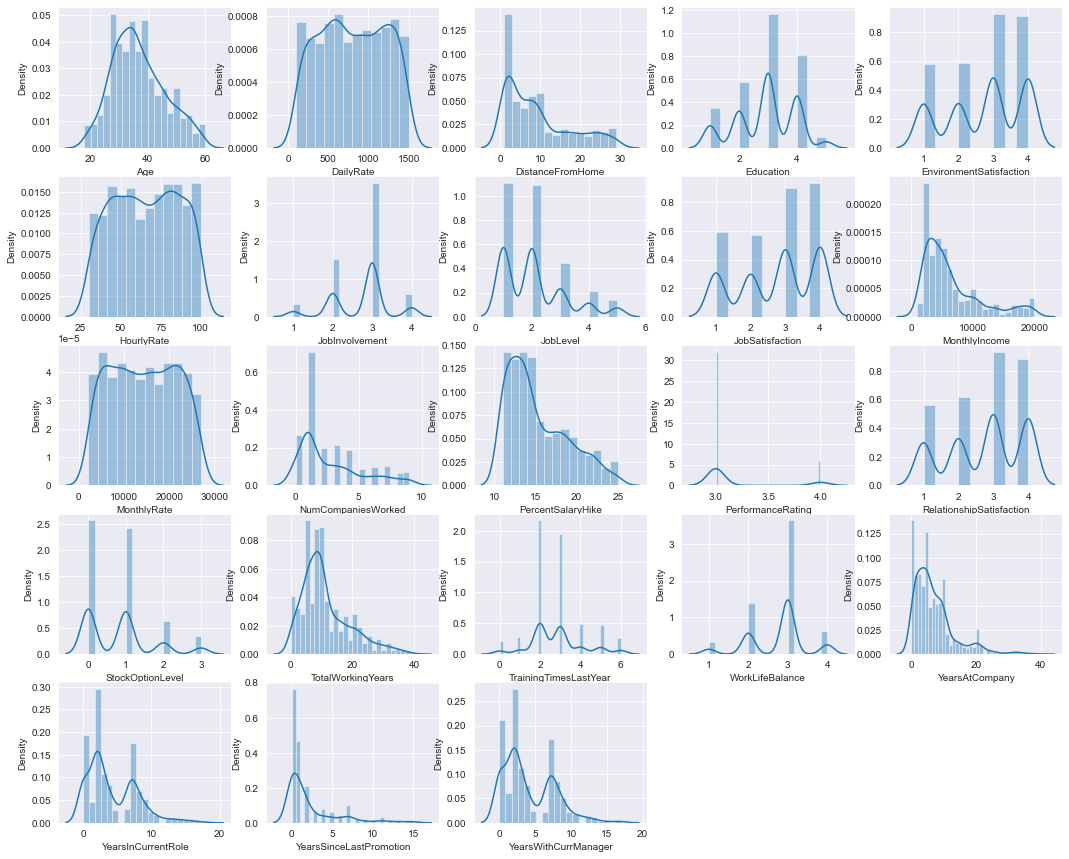

In [40]:
di=df_1.select_dtypes(exclude='object')
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.distplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1

Attributes like Total working years, Yearsatcompany, Years since last promotion, YearsInCurrentRole, YearsWithCurrManager are right skewed.

It means  some outliers must be present in dataset.

We will remove skewness by some trasformation methods.

# Outliers Detection

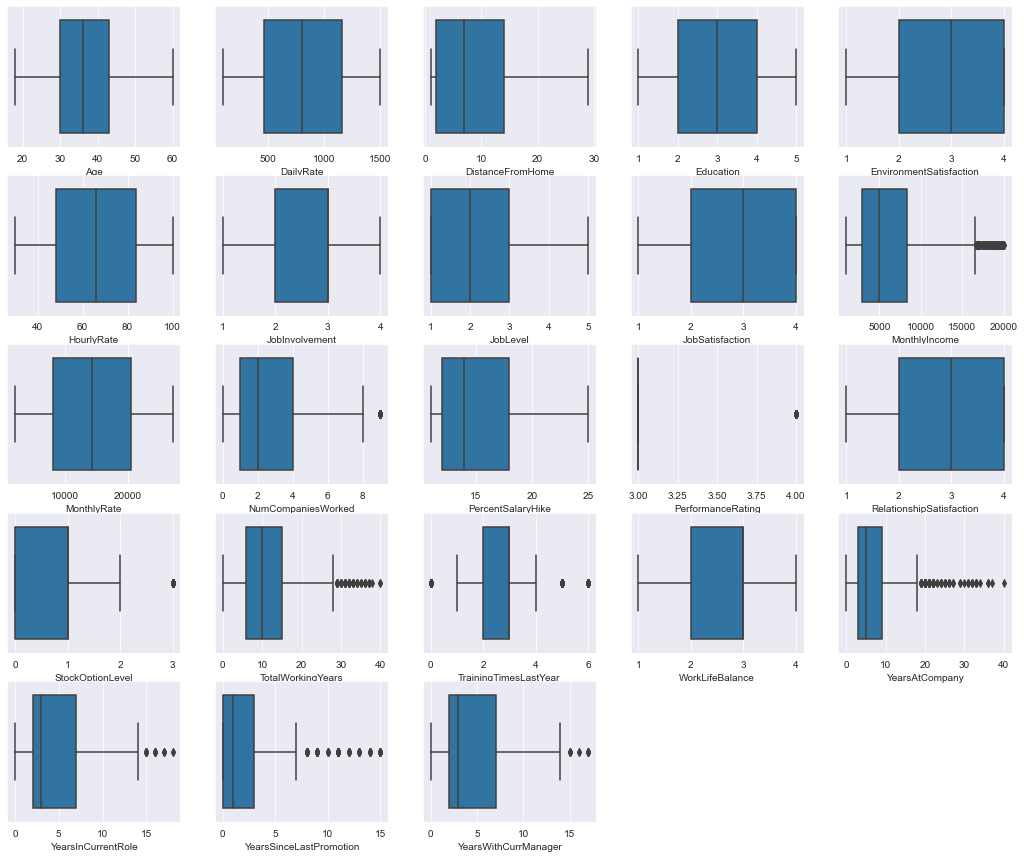

In [41]:
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.boxplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

In [42]:
# Removing Outliers
from scipy.stats import zscore
z =np.abs(zscore(di))
print(z.shape)
df_1 = df_1.loc[(z<3).all(axis=1)]
print(df_1.shape)

(1470, 23)
(1387, 32)


# Skewness Checking

In [43]:
df_1.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [44]:
for i in di:
    if df_1[i].skew()>.55:
        df_1[i]=np.log1p(df_1[i])

In [45]:
df_1.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobSatisfaction            -0.345612
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

We have removed skewness to the possible extent.

# Encoding of categorical Columns

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ob:
    df_1[col]=le.fit_transform(df_1[col])

In [47]:
df_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.693147,2,1,2,0,...,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,0,1,279,1,2.197225,1,1,3,1,...,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,1,2,1373,1,1.098612,2,4,4,1,...,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.386294,4,1,4,0,...,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,0,2,591,1,1.098612,1,3,1,1,...,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612


# Splitting Data into Input and Output Variable

In [48]:
x=df_1.drop(['Attrition','Over18'],axis=1)
y=df_1[['Attrition']]

In [49]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,1,2,0,94,...,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,1,3,1,61,...,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,4,4,1,92,...,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,1,4,0,56,...,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,3,1,1,40,...,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,3.178054,2,3,3,1,41,...,1.386294,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,2,613,1,1.945910,1,3,4,1,42,...,1.386294,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442
1467,27,2,155,1,1.609438,3,1,2,1,87,...,1.609438,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,1,1023,2,1.098612,3,3,4,1,63,...,1.386294,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [50]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.502086,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,-0.424765,-1.575817,-1.052154,-0.052493,-3.388651,-2.501172,0.297751,0.372567,-0.964086,0.628647
1,1.442111,-0.905354,-1.307769,-0.496337,0.253886,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,2.354241,1.199034,0.468783,0.247982,0.302431,0.336558,0.939176,0.980909,-0.028096,0.993844
2,0.083966,0.593126,1.406752,-0.496337,-1.028716,-0.876177,1.305159,1.169285,0.813067,1.290017,...,-0.424765,-0.650866,-1.052154,-0.228855,0.302431,0.336558,-2.463747,-1.710586,-0.964086,-1.645896
3,-0.368749,-0.905354,1.453896,-0.496337,-0.692855,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,-0.424765,0.274084,-1.052154,-0.052493,0.302431,0.336558,0.654398,0.980909,0.907895,-1.645896
4,-1.047821,0.593126,-0.533609,-0.496337,-1.028716,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,-0.424765,1.199034,0.468783,-0.428798,0.302431,0.336558,-0.904674,-0.288613,0.519424,-0.251267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.398978,-0.876177,0.556501,0.251978,0.813067,-1.225613,...,-0.424765,0.274084,0.468783,0.985391,0.302431,0.336558,0.078991,-0.288613,-0.964086,0.113930
1383,0.310324,0.593126,-0.479021,-0.496337,-0.039518,-1.853858,0.556501,1.169285,0.813067,-1.176286,...,-0.424765,-1.575817,0.468783,0.105269,1.382003,0.336558,0.487249,0.980909,-0.028096,0.993844
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.432340,0.101504,-0.940815,-0.665328,0.813067,1.043387,...,2.354241,-0.650866,0.468783,-0.428798,-3.388651,0.336558,0.297751,-0.288613,-0.964086,0.113930
1385,1.442111,-0.905354,0.538304,1.405373,-1.028716,0.101504,0.556501,1.169285,0.813067,-0.140439,...,-0.424765,1.199034,-1.052154,0.985391,0.302431,-1.082307,0.803919,0.808075,-0.964086,1.143363


# Feature Importance

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [53]:
print(extra.feature_importances_)

[0.0405425  0.02510221 0.03127422 0.02494036 0.03538989 0.02624263
 0.02921784 0.03996984 0.02112129 0.03298576 0.03584298 0.03480959
 0.03140193 0.0373691  0.03342783 0.04268047 0.02929815 0.03197278
 0.07048202 0.03008191 0.01345607 0.03257531 0.03458073 0.04059646
 0.03012512 0.03408661 0.03468772 0.03280061 0.02701691 0.03592115]


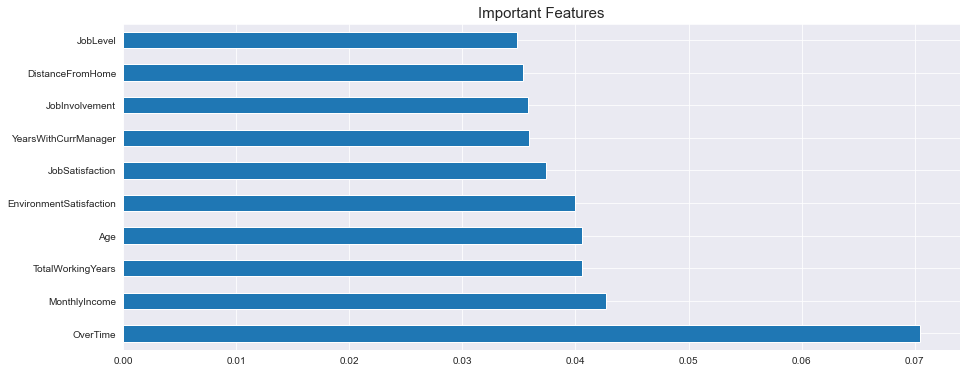

In [54]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
x.shape

(1387, 30)

We can see that over time , age and Monthly Income are 3 major attributed which decide whether employee will leave or Not.

# PCA

In [56]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_matrix=PCA(n_components=30)

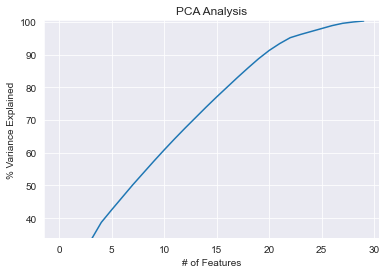

In [57]:
#Calculate Eigenvalues
covar_matrix.fit(x)  ## x should be scaled
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
## draw the graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

Based on the plot above it's clear we should pick 27 features at 99% variance.

In [58]:
pca=PCA(n_components=27)
x=pca.fit_transform(x)
x.shape

(1387, 27)

Model Building

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

In [63]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    return final_r

In [70]:
#Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max accuracy score corresponding to 60 is 0.8273381294964028


cross validation score 0.8774407189050205


Standard Deviation 0.01341848060994502


F1 score 0.5693430656934306


Training accuracy 0.7937365010799136


Test Accuracy 0.7877697841726619


Confusion Matrix [[180  52]
 [  7  39]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.78      0.86       232
           1       0.43      0.85      0.57        46

    accuracy                           0.79       278
   macro avg       0.70      0.81      0.71       278
weighted avg       0.87      0.79      0.81       278



Roc_auc Score 0.8118440779610194


60

In [71]:
#Decision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 97 is 0.7769784172661871


cross validation score 0.7620834740150118


Standard Deviation 0.018521639773199372


F1 score 0.3893805309734514


Training accuracy 1.0


Test Accuracy 0.7517985611510791


Confusion Matrix [[187  45]
 [ 24  22]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.81      0.84       232
           1       0.33      0.48      0.39        46

    accuracy                           0.75       278
   macro avg       0.61      0.64      0.62       278
weighted avg       0.79      0.75      0.77       278



Roc_auc Score 0.642147676161919


97

In [72]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 71 is 0.7050359712230215


cross validation score 0.8507648754642496


Standard Deviation 0.007260612452108379


F1 score 0.4331210191082802


Training accuracy 0.857451403887689


Test Accuracy 0.6798561151079137


Confusion Matrix [[155  77]
 [ 12  34]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.67      0.78       232
           1       0.31      0.74      0.43        46

    accuracy                           0.68       278
   macro avg       0.62      0.70      0.61       278
weighted avg       0.83      0.68      0.72       278



Roc_auc Score 0.7036169415292354


71

In [73]:
#Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 59 is 0.8201438848920863


cross validation score 0.8716645456198219


Standard Deviation 0.0018173276381763246


F1 score 0.5254237288135593


Training accuracy 0.8083153347732182


Test Accuracy 0.7985611510791367


Confusion Matrix [[191  41]
 [ 15  31]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.82      0.87       232
           1       0.43      0.67      0.53        46

    accuracy                           0.80       278
   macro avg       0.68      0.75      0.70       278
weighted avg       0.85      0.80      0.81       278



Roc_auc Score 0.7485944527736133


59

In [74]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 56 is 0.8848920863309353


cross validation score 0.8493156377425137


Standard Deviation 0.0042705301254965175


F1 score 0.475


Training accuracy 1.0


Test Accuracy 0.8489208633093526


Confusion Matrix [[217  15]
 [ 27  19]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.94      0.91       232
           1       0.56      0.41      0.47        46

    accuracy                           0.85       278
   macro avg       0.72      0.67      0.69       278
weighted avg       0.83      0.85      0.84       278



Roc_auc Score 0.6741941529235382


56

In [75]:
# adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 65 is 0.8201438848920863


cross validation score 0.856541048749448


Standard Deviation 0.011722526985238695


F1 score 0.546875


Training accuracy 0.8579913606911447


Test Accuracy 0.7913669064748201


Confusion Matrix [[185  47]
 [ 11  35]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.80      0.86       232
           1       0.43      0.76      0.55        46

    accuracy                           0.79       278
   macro avg       0.69      0.78      0.71       278
weighted avg       0.86      0.79      0.81       278



Roc_auc Score 0.7791416791604198


65

In [76]:
#Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

max accuracy score corresponding to 66 is 0.8489208633093526


cross validation score 0.8651741422746279


Standard Deviation 0.010816774868117605


F1 score 0.5523809523809524


Training accuracy 0.9643628509719222


Test Accuracy 0.8309352517985612


Confusion Matrix [[202  30]
 [ 17  29]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.87      0.90       232
           1       0.49      0.63      0.55        46

    accuracy                           0.83       278
   macro avg       0.71      0.75      0.72       278
weighted avg       0.85      0.83      0.84       278



Roc_auc Score 0.7505622188905549


66

In [77]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','Naive Bayes','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[84.53,79.85,71.22,83.45,87.41,80.57,85.25],
                         'F1_Score':[56.93,40.67,40.49,50.84,39.43,44.44,51.92],
                         'Roc_Auc score':[81.18,65.74,67.76,73.55,62.84,69.22,72.66],
                         'Cross_validation':[87.74,77.57,85.07,87.16,85.14,85.65,86.30]})
best_model

,Model,Accuracy Score,F1_Score,Roc_Auc score,Cross_validation
0,LogisticRegression,84.53,56.93,81.18,87.74
1,DecisionTreeClassifier,79.85,40.67,65.74,77.57
2,Naive Bayes,71.22,40.49,67.76,85.07
3,GaussianNB,83.45,50.84,73.55,87.16
4,RandomForestClassifier,87.41,39.43,62.84,85.14
5,AdaBoostClassifier,80.57,44.44,69.22,85.65
6,GradientBoostingClassifier,85.25,51.92,72.66,86.30


Logistic Regression gives us a F-1 score among all other MOdels. Additionally, Roc_auc score is Heighest among all the Models. We can see that the accuracy score for logistic Regression Model is also Good.

So considering all parameters like f1 score,roc_auc score and accuracy score our final model will be Logistic Regression.

# Hyperparameter Tuning

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=.20,stratify=y)
## Upsampling
x_train_s,y_train_s=SMOTE().fit_resample(x_train,y_train)
lg=LogisticRegression()
param={'penalty':['l2','l1'],'C':[.0001,.001,.01,1,10],'solver':['liblinear','saga']}

grid=GridSearchCV(estimator=lg,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train_s,y_train_s)

grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [79]:
lg_final=LogisticRegression(C=10,penalty='l2',solver='liblinear')
lg_final.fit(x_train_s,y_train_s)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.841726618705036


Final f_1 score : 0.6451612903225806


Final roc_auc score : 0.7414102564102564


Final classification Report :               precision    recall  f1-score   support

           0       0.84      0.97      0.90       200
           1       0.87      0.51      0.65        78

    accuracy                           0.84       278
   macro avg       0.85      0.74      0.77       278
weighted avg       0.85      0.84      0.83       278



Final confusion Matrix : [[194   6]
 [ 38  40]]


Our f1_score is improved from 56.93 to 63.49 so we have improve our f1 score by hyperparameter tuning. We will save this as our final Model.

# Saving model

In [80]:
import joblib
joblib.dump(lg_final,'Attrition_lg.pkl')

['Attrition_lg.pkl']

# Loading Our Model

In [81]:
loaded_model=joblib.load('Attrition_lg.pkl')
prediction=loaded_model.predict(x_test)